# **Notebook to analyse data**

### **Imports**

In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import sys

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


### **Processing Steps**

#### **Functions data 1**

In [2]:
# def load_imgs(image, density):
#     path = f'data/image{image}_100_{density}_10.ics'
#     imgs = dip.ImageReadICS(path)
    
#     return imgs

# def plot(
#         image,
#         image_array,
#         gradient_array,
#         corrected_image,
#         image_mean_sub,
#         image_gauss,
#         image_thres,
#         image_label,
#         critical_points
# ):
#         fig, ax = plt.subplots(4, 2, figsize=(9, 9), facecolor='black')
#         c = (0,0)
#         ax[c[0],c[1]].imshow(np.asarray(image), cmap='gray')
#         ax[c[0],c[1]].set_title('Original Image', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (0,1)
#         ax[c[0],c[1]].imshow(image_array, cmap='gray')
#         ax[c[0],c[1]].set_title('Cropped Image', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (1,0)
#         ax[c[0],c[1]].imshow(gradient_array, cmap='gray')
#         ax[c[0],c[1]].set_title('Estimated Background', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (1,1)
#         ax[c[0],c[1]].imshow(corrected_image, cmap='gray')
#         ax[c[0],c[1]].set_title('Corrected Image', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (2,0)
#         ax[c[0],c[1]].imshow(np.asarray(image_mean_sub), cmap='gray')
#         ax[c[0],c[1]].set_title('Mean subtraction & ContrastStetch', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (2,1)
#         ax[c[0],c[1]].imshow(np.asarray(image_gauss), cmap='gray')
#         ax[c[0],c[1]].set_title('Gauss image', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (3,0)
#         ax[c[0],c[1]].imshow(np.asarray(image_thres), cmap='gray')
#         ax[c[0],c[1]].set_title('Theshold Image', c='white')
#         ax[c[0],c[1]].axis('off')

#         c = (3,1)
#         ax[c[0],c[1]].imshow(np.asarray(image_label), cmap='gray')
#         ax[c[0],c[1]].scatter(critical_points[:,0], critical_points[:,1], c='r', s=10, label='Found points')
#         ax[c[0],c[1]].set_title('Label Image', c='white')
#         ax[c[0],c[1]].axis('off')
#         ax[c[0],c[1]].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

#         plt.show()

# def create_gradient_array(rows, cols, start=1, end=0):
#     x = np.linspace(start, end, cols)
#     y = np.linspace(start, end, rows)
#     xv, yv = np.meshgrid(x, y)

#     gradient_array = (xv + yv) / 2

#     return gradient_array

# def get_critical_points(image_num, density, frame, crit_min_max=(50,2500), sigma=2, crop=True): 
#     image = frame.Squeeze()

#     if crop:
#         cropped_image = image[20:-40,40:]
#     else:
#         cropped_image = image

#     critical_size = crit_min_max # (min size, max size)

#     image_array = np.asarray(cropped_image)

#     rows = image_array.shape[0]
#     cols = image_array.shape[1]

#     gradient_array = create_gradient_array(rows, cols, 40, 10)
#     corrected_image = (image_array - gradient_array).clip(min=0)

#     image_mean_sub = dip.ContrastStretch(dip.Image((corrected_image - np.mean(corrected_image)).clip(min=0)), lowerBound=80) # Mean subtraction and contrast stretch

#     image_gauss = dip.Gauss(dip.Image(image_mean_sub), sigmas=[sigma])
#     image_thres = dip.IsodataThreshold(image_gauss)
#     image_label = dip.Label(image_thres)

#     measurement = dip.MeasurementTool.Measure(label=image_label, grey=cropped_image.Squeeze(), features=['Gravity', 'Size'])

#     critical_points = [measurement['Gravity'][i]
#                         for i in range(1,measurement.NumberOfObjects())
#                         if measurement['Size'][i][0] < critical_size[1] 
#                         and measurement['Size'][i][0] > critical_size[0]]
    
#     return critical_points

# def analyse_image_with_plot(image_num, density, frame, crit_min_max=(50,2500), sigma=2, crop=True): 
#     image = load_imgs(image_num, density)[:,:,frame].Squeeze()

#     if crop:
#         cropped_image = image[20:-40,40:]
#     else:
#         cropped_image = image

#     critical_size = crit_min_max # (min size, max size)

#     image_array = np.asarray(cropped_image)

#     rows = image_array.shape[0]
#     cols = image_array.shape[1]

#     gradient_array = create_gradient_array(rows, cols, 40, 10)
#     corrected_image = (image_array - gradient_array).clip(min=0)

#     image_mean_sub = dip.ContrastStretch(dip.Image((corrected_image - np.mean(corrected_image)).clip(min=0)), lowerBound=80)

#     image_gauss = dip.Gauss(dip.Image(image_mean_sub), sigmas=[sigma])
#     image_thres = dip.IsodataThreshold(image_gauss)
#     image_label = dip.Label(image_thres)

#     measurement = dip.MeasurementTool.Measure(label=image_label, grey=cropped_image.Squeeze(), features=['Gravity', 'Size'])

#     critical_points = np.array([measurement['Gravity'][i]
#                                 for i in range(1,measurement.NumberOfObjects())
#                                 if measurement['Size'][i][0] < critical_size[1] 
#                                 and measurement['Size'][i][0] > critical_size[0]])

#     print(f'Critical size: {critical_size} | Amount of found points: {len(critical_points)}')
#     plot(
#         image,
#         image_array,
#         gradient_array,
#         corrected_image,
#         image_mean_sub,
#         image_gauss,
#         image_thres,
#         image_label,
#         critical_points
#     )

#### **Functions data 2**

In [17]:
def load_imgs_2(image, density):
    path = f'data2/image{image}_100_{density}_10.ics'
    imgs = dip.ImageReadICS(path)
    
    return imgs

def create_gradient_array(rows, cols, start=1, end=0):
    x = np.linspace(start, end, cols)
    y = np.linspace(start, end, rows)
    xv, yv = np.meshgrid(x, y)

    gradient_array = (xv + yv) / 2

    return gradient_array

def plot(
    image,
    image_array,
    gradient_array,
    corrected_image,
    image_mean_sub,
    image_gauss,
    image_thres,
    image_label,
    critical_points
):
    fig, ax = plt.subplots(4, 2, figsize=(9, 9), facecolor='black')
    c = (0,0)
    ax[c[0],c[1]].imshow(np.asarray(image), cmap='gray')
    ax[c[0],c[1]].set_title('Original Image', c='white')
    ax[c[0],c[1]].axis('off')

    c = (0,1)
    ax[c[0],c[1]].imshow(image_array, cmap='gray')
    ax[c[0],c[1]].set_title('Cropped Image', c='white')
    ax[c[0],c[1]].axis('off')

    c = (1,0)
    ax[c[0],c[1]].imshow(gradient_array, cmap='gray')
    ax[c[0],c[1]].set_title('Estimated Background', c='white')
    ax[c[0],c[1]].axis('off')

    c = (1,1)
    ax[c[0],c[1]].imshow(corrected_image, cmap='gray')
    ax[c[0],c[1]].set_title('Corrected Image', c='white')
    ax[c[0],c[1]].axis('off')

    c = (2,0)
    ax[c[0],c[1]].imshow(np.asarray(image_mean_sub), cmap='gray')
    ax[c[0],c[1]].set_title('Mean subtraction & ContrastStetch', c='white')
    ax[c[0],c[1]].axis('off')

    c = (2,1)
    ax[c[0],c[1]].imshow(np.asarray(image_gauss), cmap='gray')
    ax[c[0],c[1]].set_title('Gauss image', c='white')
    ax[c[0],c[1]].axis('off')

    c = (3,0)
    ax[c[0],c[1]].imshow(np.asarray(image_thres), cmap='gray')
    ax[c[0],c[1]].set_title('Theshold Image', c='white')
    ax[c[0],c[1]].axis('off')

    c = (3,1)
    ax[c[0],c[1]].imshow(np.asarray(image_label), cmap='gray')
    ax[c[0],c[1]].scatter(critical_points[:,0], critical_points[:,1], c='r', s=10, label='Found points')
    ax[c[0],c[1]].set_title('Label Image', c='white')
    ax[c[0],c[1]].axis('off')
    ax[c[0],c[1]].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

    plt.show()

def get_critical_points_2(frame, crit_min_max=(50,2500), sigma=2, crop=True): 
    image = frame.Squeeze()

    if crop:
        cropped_image = image[20:-20,20:-20]
    else:
        cropped_image = image

    image_array = np.asarray(cropped_image)

    rows = image_array.shape[0]
    cols = image_array.shape[1]

    image_mean_sub = dip.ContrastStretch(dip.Image((image_array - np.mean(image_array)).clip(min=0)), lowerBound=80) # Mean subtraction and contrast stretch

    image_gauss = dip.Gauss(dip.Image(image_mean_sub), sigmas=[sigma])
    image_thres = dip.IsodataThreshold(image_gauss)
    image_label = dip.Label(image_thres)

    measurement = dip.MeasurementTool.Measure(label=image_label, grey=cropped_image.Squeeze(), features=['Gravity', 'Size'])

    critical_points = [measurement['Gravity'][i]
                        for i in range(1,measurement.NumberOfObjects())
                        if measurement['Size'][i][0] < crit_min_max[1] 
                        and measurement['Size'][i][0] > crit_min_max[0]]
    
    return critical_points

def analyse_image_with_plot_2(image_num, density, frame, crit_min_max=(50,2500), sigma=2, crop=True): 
    image = load_imgs_2(image_num, density)[:,:,frame].Squeeze()

    if crop:
        cropped_image = image[20:-20,20:-20]
    else:
        cropped_image = image

    critical_size = crit_min_max # (min size, max size)

    image_array = np.asarray(cropped_image)

    rows = image_array.shape[0]
    cols = image_array.shape[1]

    image_mean_sub = dip.ContrastStretch(dip.Image((image_array - np.mean(image_array)).clip(min=0)), lowerBound=80)

    image_gauss = dip.Gauss(dip.Image(image_mean_sub), sigmas=[sigma])
    image_thres = dip.IsodataThreshold(image_gauss)
    image_label = dip.Label(image_thres)

    measurement = dip.MeasurementTool.Measure(label=image_label, grey=cropped_image.Squeeze(), features=['Gravity', 'Size'])

    critical_points = np.array([measurement['Gravity'][i]
                                for i in range(1,measurement.NumberOfObjects())
                                if measurement['Size'][i][0] < critical_size[1] 
                                and measurement['Size'][i][0] > critical_size[0]])

    print(f'Critical size: {critical_size} | Amount of found points: {len(critical_points)}')
    plot(
        image,
        image_array,
        image_array,
        image_array,
        image_mean_sub,
        image_gauss,
        image_thres,
        image_label,
        critical_points
    )

#### **Test**

In [4]:
frame_range = {
    1:{
        20: (20, 1490),
        50: (0, 1580)
    },
    2:{
        20: (7, 1647),
        50: (2, 1696)
    }
}

Critical size: (50, 2500) | Amount of found points: 34


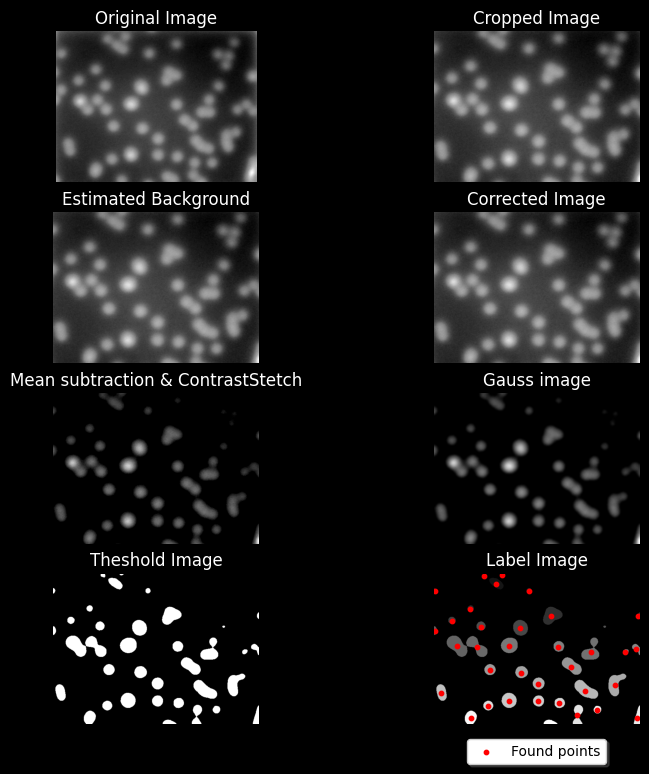

In [14]:
analyse_image_with_plot_2(image_num=2, density=20, frame=200, crit_min_max=(50,2500), crop=True)

### **Create Image**

In [21]:
image_num = 2
density = 50

imgs = load_imgs_2(image_num,density)
max_frames = 100
frames = imgs.Sizes()[2]
coordinates = []

print(f'Image: {image_num} | Density: {density}| Frames: {frames}')

# Loop through recorded frames
for frame_num in range(frame_range[image_num][density][0], frame_range[image_num][density][1]):
    # Get centers of mass
    coordinates.append(get_critical_points_2(frame=imgs[:,:,frame_num]))

# Reconstruct image
rc = dip.Image(sizes=[640, 480], dt='SFLOAT')
rc.Fill(0)

for i in coordinates:
    for jj in i:
        rc[round(jj[0]), round(jj[1])] = rc[round(jj[0]), round(jj[1])][0] + 1.0

dip.viewer.Show(rc)

Image: 2 | Density: 50| Frames: 1712


In [15]:
dip.viewer.Show(rc)

### **Plots for report**

Critical size: (50, 2500) | Amount of found points: 5


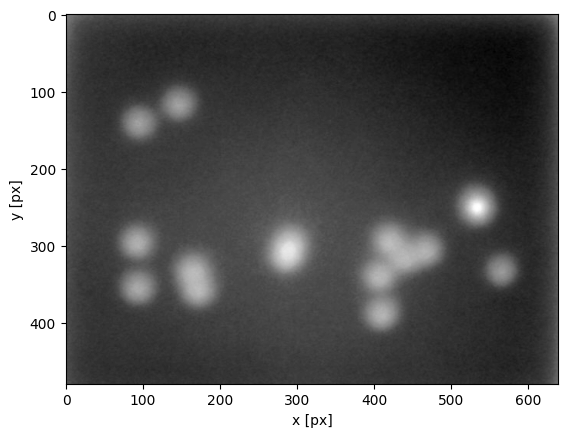

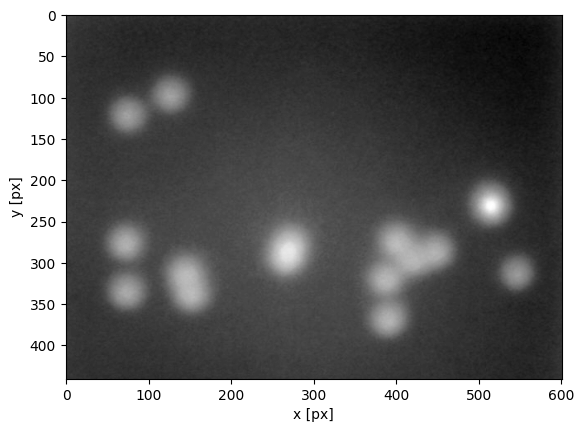

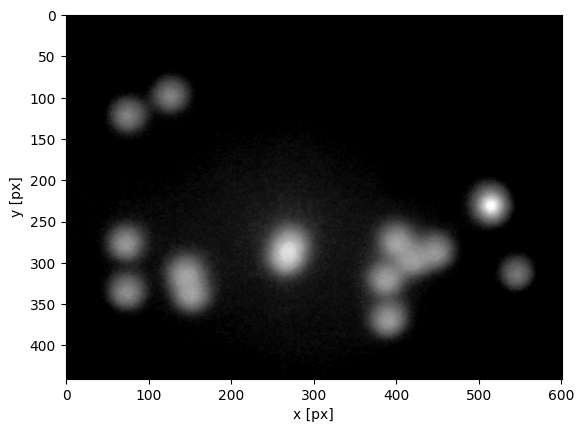

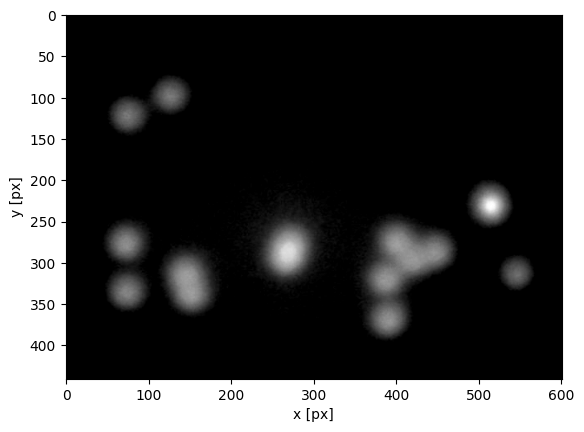

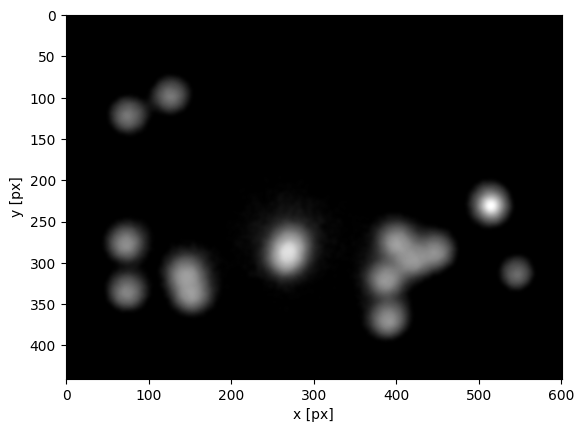

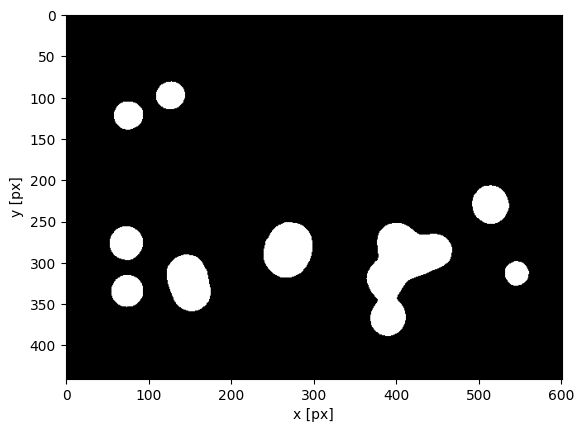

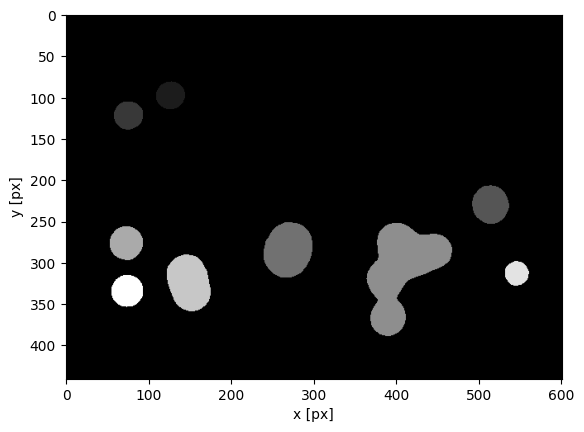

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


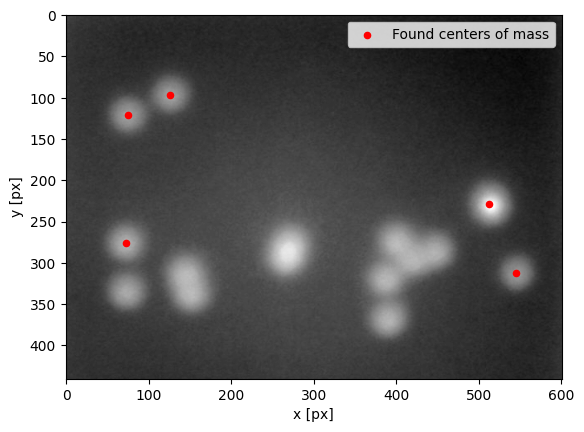

In [12]:
frame = 50
image = load_imgs_2(image_num, density)[:,:,frame].Squeeze()
critical_size = (50, 2500) # (minimun blob size, maximum blob size)
sigma = 2

cropped_image = image[20:-20,20:-20] # Crop the image
image_array = np.asarray(cropped_image)

rows = image_array.shape[0]
cols = image_array.shape[1]

image_mean_sub = dip.Image((image_array - np.mean(image_array)).clip(min=0)) # Subtract the mean value from the image
image_contrast = dip.ContrastStretch(image_mean_sub, lowerBound=80) # Apply a ContrastStretch filter

image_gauss = dip.Gauss(image_contrast, sigmas=[sigma]) # Apply a Gauss filter
image_thres = dip.IsodataThreshold(image_gauss) # Get the threshold image
image_label = dip.Label(image_thres) # Get the label image

measurement = dip.MeasurementTool.Measure(label=image_label, grey=cropped_image.Squeeze(), features=['Gravity', 'Size']) # Find all center of masses

# Extract coordinates of measurements with a size filter
critical_points = np.array([measurement['Gravity'][i]
                            for i in range(1,measurement.NumberOfObjects())
                            if measurement['Size'][i][0] < critical_size[1] 
                            and measurement['Size'][i][0] > critical_size[0]])

print(f'Critical size: {critical_size} | Amount of found points: {len(critical_points)}')

# Plot and save all processing steps
def plot_save(image, title):
    plt.figure()
    plt.imshow(np.asarray(image), cmap='gray')
    plt.xlabel('x [px]')
    plt.ylabel('y [px]')
    plt.savefig('plots/'+title+'.eps', format='eps')
    plt.show()

plot_save(image, 'original')
plot_save(cropped_image, 'cropped')
plot_save(image_mean_sub, 'mean_sub')
plot_save(image_contrast, 'contrast')
plot_save(image_gauss, 'gauss')
plot_save(image_thres, 'threshold')
plot_save(image_label, 'label')

plt.figure()
plt.imshow(np.asarray(cropped_image), cmap='gray')
plt.scatter(critical_points[:,0], critical_points[:,1], c='r', s=20, label='Found centers of mass')
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.legend()
plt.savefig('plots/measurements.eps', format='eps')
plt.show()